### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



### 1.1 Generación un solo Dataframe

In [2]:
tienda['n_tienda'] = 'tienda_1'
tienda2['n_tienda'] = 'tienda_2'
tienda3['n_tienda'] = 'tienda_3'
tienda4['n_tienda'] = 'tienda_4'
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
tiendas.sample(10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,n_tienda
1058,Tablet ABXY,Electrónicos,753900.0,40500.0,25/10/2021,Ángel Rodriguez,Medellín,5,Tarjeta de crédito,4,6.25184,-75.56359,tienda_4
527,Cuerda para saltar,Deportes y diversión,14000.0,0.0,19/08/2020,Maria Alfonso,Manizales,5,Tarjeta de crédito,9,5.06889,-75.51738,tienda_4
844,Dashboards con Power BI,Libros,34700.0,2100.0,06/02/2021,Juliana Costa,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,tienda_4
2194,Balón de voleibol,Deportes y diversión,39800.0,0.0,16/03/2021,Camila Rivera,Bogotá,3,Tarjeta de crédito,1,4.60971,-74.08175,tienda_3
1521,Juego de mesa,Juguetes,186700.0,10200.0,01/07/2021,Rafael Acosta,Leticia,1,Tarjeta de crédito,2,-4.21528,-69.94056,tienda_3
961,Asistente virtual,Electrónicos,121100.0,4600.0,27/10/2022,Juan Fernandez,Bogotá,1,Tarjeta de crédito,3,4.60971,-74.08175,tienda_4
2014,Sillón,Muebles,278300.0,15500.0,05/02/2023,Felipe Santos,Bogotá,3,Nequi,1,4.60971,-74.08175,tienda_1
1191,Mesa de centro,Muebles,164300.0,9100.0,18/03/2021,Maria Alfonso,Bogotá,5,Tarjeta de crédito,4,4.60971,-74.08175,tienda_2
572,Balón de voleibol,Deportes y diversión,52600.0,3000.0,09/01/2021,Rafael Acosta,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,tienda_3
518,Mesa de noche,Muebles,268200.0,12500.0,23/09/2020,Rafael Acosta,Medellín,4,Tarjeta de crédito,5,6.25184,-75.56359,tienda_1



### 1.2 Ingresos totales por cada tienda

In [3]:
def calcular_ingresos_tiendas(tiendas):
    print("=" * 60)
    print("💰 CÁLCULO DE INGRESOS TOTALES POR TIENDA")
    print("=" * 60)

    # Calcular ingresos totales por tienda
    ingresos_tiendas = tiendas.groupby('n_tienda')['Precio'].sum().sort_values(ascending=False)

    # Mostrar resultados
    print("📊 INGRESOS TOTALES POR TIENDA:")
    for tienda, ingreso in ingresos_tiendas.items():
        print(f"   {tienda}: ${ingreso:,.2f}")

    # Estadísticas adicionales
    print(f"\n📈 ESTADÍSTICAS DE INGRESOS:")
    print(f"   • Ingreso total todas las tiendas: ${ingresos_tiendas.sum():,.2f}")
    print(f"   • Ingreso promedio por tienda: ${ingresos_tiendas.mean():,.2f}")
    print(f"   • Tienda con mayor ingreso: {ingresos_tiendas.index[0]} (${ingresos_tiendas.iloc[0]:,.2f})")
    print(f"   • Tienda con menor ingreso: {ingresos_tiendas.index[-1]} (${ingresos_tiendas.iloc[-1]:,.2f})")
    print(f"   • Diferencia entre mayor y menor: ${ingresos_tiendas.iloc[0] - ingresos_tiendas.iloc[-1]:,.2f}")

    return ingresos_tiendas

# Calcular ingresos
ingresos_totales = calcular_ingresos_tiendas(tiendas)


💰 CÁLCULO DE INGRESOS TOTALES POR TIENDA
📊 INGRESOS TOTALES POR TIENDA:
   tienda_1: $1,150,880,400.00
   tienda_2: $1,116,343,500.00
   tienda_3: $1,098,019,600.00
   tienda_4: $1,038,375,700.00

📈 ESTADÍSTICAS DE INGRESOS:
   • Ingreso total todas las tiendas: $4,403,619,200.00
   • Ingreso promedio por tienda: $1,100,904,800.00
   • Tienda con mayor ingreso: tienda_1 ($1,150,880,400.00)
   • Tienda con menor ingreso: tienda_4 ($1,038,375,700.00)
   • Diferencia entre mayor y menor: $112,504,700.00


# 2. Ventas por categoría

### 2.1 Explorar datos de tiendas

In [4]:
def explorar_datos():
    print("=" * 60)
    print("📁 EXPLORANDO ARCHIVO DE TIENDAS")
    print("=" * 60)

    try:
        print(f"📊 Dimensiones: {tiendas.shape[0]} filas × {tiendas.shape[1]} columnas")

        # Mostrar información básica
        print(f"\n🔍 INFORMACIÓN DE COLUMNAS:")
        print(f"   • n_tienda: {tiendas['n_tienda'].nunique()} tiendas únicas")
        print(f"   • Categorías: {tiendas['Categoría del Producto'].nunique()} categorías únicas")
        print(f"   • Productos: {tiendas['Producto'].nunique()} productos únicos")

        return tiendas

    except FileNotFoundError:
        print("❌ Error: Archivo 'tiendas' no encontrado")
        return None
    except Exception as e:
        print(f"❌ Error cargando archivo: {e}")
        return None

# Cargar los datos
df_tiendas = explorar_datos()

📁 EXPLORANDO ARCHIVO DE TIENDAS
📊 Dimensiones: 9435 filas × 13 columnas

🔍 INFORMACIÓN DE COLUMNAS:
   • n_tienda: 4 tiendas únicas
   • Categorías: 8 categorías únicas
   • Productos: 51 productos únicos


### 2.2 Cantidad de productos vendidos por categoria en cada tienda.


In [5]:
def calcular_ventas_por_categoria_tienda(tiendas):
    """
    Calcula la cantidad de productos vendidos por categoría en cada tienda
    """
    print("=" * 60)
    print("📈 CÁLCULO DE VENTAS POR CATEGORÍA EN CADA TIENDA")
    print("=" * 60)

    if tiendas is None:
        return None

    # Agrupar por tienda y categoría, contar las ventas
    ventas_por_categoria = tiendas.groupby(['n_tienda', 'Categoría del Producto']).agg({
        'Producto': 'count',  # Contar cantidad de ventas
        'Precio': 'sum'       # Sumar ingresos por categoría
    }).rename(columns={
        'Producto': 'Cantidad_Ventas',
        'Precio': 'Ingreso_Total'
    }).reset_index()

    print("📊 VENTAS POR CATEGORÍA EN CADA TIENDA:")
    print(ventas_por_categoria)

    return ventas_por_categoria

# Calcular las ventas
ventas_categoria = calcular_ventas_por_categoria_tienda(tiendas)

📈 CÁLCULO DE VENTAS POR CATEGORÍA EN CADA TIENDA
📊 VENTAS POR CATEGORÍA EN CADA TIENDA:
    n_tienda   Categoría del Producto  Cantidad_Ventas  Ingreso_Total
0   tienda_1  Artículos para el hogar              171     12698400.0
1   tienda_1     Deportes y diversión              284     39290000.0
2   tienda_1        Electrodomésticos              312    363685200.0
3   tienda_1             Electrónicos              448    429493500.0
4   tienda_1   Instrumentos musicales              182     91299000.0
5   tienda_1                 Juguetes              324     17995700.0
6   tienda_1                   Libros              173      8784900.0
7   tienda_1                  Muebles              465    187633700.0
8   tienda_2  Artículos para el hogar              181     14746900.0
9   tienda_2     Deportes y diversión              275     34744500.0
10  tienda_2        Electrodomésticos              305    348567800.0
11  tienda_2             Electrónicos              422    410831100.0
12

### 2.3 Categorias más populares de cada tienda.

In [6]:
def categorias_mas_populares(ventas_categoria):
    """
    Identifica las categorías más populares en cada tienda
    """
    print("\n" + "=" * 60)
    print("🏆 CATEGORÍAS MÁS POPULARES POR TIENDA")
    print("=" * 60)

    if tiendas is None:
        return None

    # Encontrar la categoría con más ventas por tienda
    categorias_populares = ventas_categoria.loc[ventas_categoria.groupby('n_tienda')['Cantidad_Ventas'].idxmax()]

    print("🎯 CATEGORÍA MÁS VENDIDA EN CADA TIENDA:")
    for _, row in categorias_populares.iterrows():
        print(f"   Tienda {row['n_tienda']}: {row['Categoría del Producto']}")
        print(f"      • Ventas: {row['Cantidad_Ventas']}")
        print(f"      • Ingresos: ${row['Ingreso_Total']:,.2f}")
        print()

    return categorias_populares

# Identificar categorías populares
categorias_populares = categorias_mas_populares(ventas_categoria)


🏆 CATEGORÍAS MÁS POPULARES POR TIENDA
🎯 CATEGORÍA MÁS VENDIDA EN CADA TIENDA:
   Tienda tienda_1: Muebles
      • Ventas: 465
      • Ingresos: $187,633,700.00

   Tienda tienda_2: Muebles
      • Ventas: 442
      • Ingresos: $176,426,300.00

   Tienda tienda_3: Muebles
      • Ventas: 499
      • Ingresos: $201,072,100.00

   Tienda tienda_4: Muebles
      • Ventas: 480
      • Ingresos: $192,528,900.00



### 2.4 Analisís detallados por tiendas

In [7]:
def analisis_detallado_por_tienda(ventas_df):
    """
    Realiza un análisis detallado para cada tienda individual
    """
    print("=" * 60)
    print("🔍 ANÁLISIS DETALLADO POR TIENDA")
    print("=" * 60)

    if ventas_df is None:
        return

    # Obtener lista de tiendas
    tiendas = ventas_df['n_tienda'].unique()

    for tienda in sorted(tiendas):
        print(f"\n🏪 TIENDA {tienda}:")
        print("-" * 30)

        # Filtrar datos de la tienda
        datos_tienda = ventas_df[ventas_df['n_tienda'] == tienda].sort_values('Cantidad_Ventas', ascending=False)

        # Mostrar ranking de categorías
        for i, (_, row) in enumerate(datos_tienda.iterrows(), 1):
            print(f"   {i}. {row['Categoría del Producto']}: {row['Cantidad_Ventas']} ventas (${row['Ingreso_Total']:,.2f})")

        # Estadísticas resumen
        total_ventas = datos_tienda['Cantidad_Ventas'].sum()
        total_ingresos = datos_tienda['Ingreso_Total'].sum()
        categorias_unicas = len(datos_tienda)

        print(f"\n   📊 RESUMEN:")
        print(f"   • Total ventas: {total_ventas}")
        print(f"   • Total ingresos: ${total_ingresos:,.2f}")
        print(f"   • Categorías diferentes: {categorias_unicas}")

# Realizar análisis detallado
analisis_detallado_por_tienda(ventas_categoria)

🔍 ANÁLISIS DETALLADO POR TIENDA

🏪 TIENDA tienda_1:
------------------------------
   1. Muebles: 465 ventas ($187,633,700.00)
   2. Electrónicos: 448 ventas ($429,493,500.00)
   3. Juguetes: 324 ventas ($17,995,700.00)
   4. Electrodomésticos: 312 ventas ($363,685,200.00)
   5. Deportes y diversión: 284 ventas ($39,290,000.00)
   6. Instrumentos musicales: 182 ventas ($91,299,000.00)
   7. Libros: 173 ventas ($8,784,900.00)
   8. Artículos para el hogar: 171 ventas ($12,698,400.00)

   📊 RESUMEN:
   • Total ventas: 2359
   • Total ingresos: $1,150,880,400.00
   • Categorías diferentes: 8

🏪 TIENDA tienda_2:
------------------------------
   1. Muebles: 442 ventas ($176,426,300.00)
   2. Electrónicos: 422 ventas ($410,831,100.00)
   3. Juguetes: 313 ventas ($15,945,400.00)
   4. Electrodomésticos: 305 ventas ($348,567,800.00)
   5. Deportes y diversión: 275 ventas ($34,744,500.00)
   6. Instrumentos musicales: 224 ventas ($104,990,300.00)
   7. Libros: 197 ventas ($10,091,200.00)
   8.

# 3. Calificación promedio de la tienda


### 3.1 Calificaciones promedio de los clientes para cada tienda

In [8]:
# 2. CALCULAR CALIFICACIONES PROMEDIO POR TIENDA
def calcular_calificaciones_promedio(tiendas):
    """
    Calcula las calificaciones promedio y estadísticas por tienda
    """
    print("\n" + "=" * 60)
    print("⭐ CÁLCULO DE CALIFICACIONES PROMEDIO POR TIENDA")
    print("=" * 60)

    if tiendas is None:
        return None

    # Calcular estadísticas por tienda
    calificaciones_tienda = tiendas.groupby('n_tienda').agg({
        'Calificación': ['mean', 'count', 'min', 'max']
    }).round(2)

    # Aplanar columnas multiindex
    calificaciones_tienda.columns = ['Promedio', 'Total_Calificaciones', 'Minimo', 'Maximo']

    calificaciones_tienda = calificaciones_tienda.reset_index()

    print("📊 CALIFICACIONES POR TIENDA:")
    print(calificaciones_tienda)

    return calificaciones_tienda

# Calcular calificaciones
calificaciones_promedio = calcular_calificaciones_promedio(tiendas)


⭐ CÁLCULO DE CALIFICACIONES PROMEDIO POR TIENDA
📊 CALIFICACIONES POR TIENDA:
   n_tienda  Promedio  Total_Calificaciones  Minimo  Maximo
0  tienda_1      3.98                  2359       1       5
1  tienda_2      4.04                  2359       1       5
2  tienda_3      4.05                  2359       1       5
3  tienda_4      4.00                  2358       1       5


### 3.2 Ranking de tiendas por Satisfacción

In [9]:
# 3. RANKING DE TIENDAS POR SATISFACCIÓN
def ranking_satisfaccion_tiendas(calificaciones_tienda):
    """
    Crea un ranking de tiendas por satisfacción del cliente
    """
    print("\n" + "=" * 60)
    print("🏆 RANKING DE SATISFACCIÓN POR TIENDA")
    print("=" * 60)

    if calificaciones_tienda is None:
        return None

    # Ordenar por calificación promedio (descendente)
    ranking = calificaciones_tienda.sort_values('Promedio', ascending=False)

    print("🥇 RANKING DE TIENDAS POR CALIFICACIÓN PROMEDIO:")
    for i, (_, row) in enumerate(ranking.iterrows(), 1):
        print(f"   {i}. Tienda {row['n_tienda']}: {row['Promedio']:.2f} ⭐")

    # Identificar mejor y peor tienda
    mejor_tienda = ranking.iloc[0]
    peor_tienda = ranking.iloc[-1]

    print(f"\n📈 MEJOR TIENDA EN SATISFACCIÓN:")
    print(f"   Tienda {mejor_tienda['n_tienda']}: {mejor_tienda['Promedio']:.2f} ⭐")

    print(f"\n📉 TIENDA CON MENOR SATISFACCIÓN:")
    print(f"   Tienda {peor_tienda['n_tienda']}: {peor_tienda['Promedio']:.2f} ⭐")

    print(f"\n📊 DIFERENCIA: {mejor_tienda['Promedio'] - peor_tienda['Promedio']:.2f} puntos")

    return ranking

# Generar ranking
ranking_satisfaccion = ranking_satisfaccion_tiendas(calificaciones_promedio)


🏆 RANKING DE SATISFACCIÓN POR TIENDA
🥇 RANKING DE TIENDAS POR CALIFICACIÓN PROMEDIO:
   1. Tienda tienda_3: 4.05 ⭐
   2. Tienda tienda_2: 4.04 ⭐
   3. Tienda tienda_4: 4.00 ⭐
   4. Tienda tienda_1: 3.98 ⭐

📈 MEJOR TIENDA EN SATISFACCIÓN:
   Tienda tienda_3: 4.05 ⭐

📉 TIENDA CON MENOR SATISFACCIÓN:
   Tienda tienda_1: 3.98 ⭐

📊 DIFERENCIA: 0.07 puntos


# 4. Productos más y menos vendidos

### 4.1 Productos más y menos vendidos.

In [10]:
ventas_productos = tiendas.groupby(['n_tienda', 'Producto']).agg({
        'Producto': 'count',  # Cantidad de ventas
        'Precio': 'sum',      # Ingresos totales
        'Calificación': 'mean' # Calificación promedio del producto
    }).rename(columns={
        'Producto': 'Cantidad_Ventas',
        'Precio': 'Ingresos_Totales',
        'Calificación': 'Calificacion_Promedio'
    }).reset_index()

def identificar_productos_destacados(ventas_df):
    """
    Identifica los productos más y menos vendidos en cada tienda
    """
    print("\n" + "=" * 60)
    print("🏆 PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA")
    print("=" * 60)

    if ventas_df is None:
        return None, None

    # Productos más vendidos por tienda

    productos_mas_vendidos = ventas_df.loc[ventas_df.groupby('n_tienda')['Cantidad_Ventas'].idxmax()]

    # Productos menos vendidos por tienda (excluyendo productos con 0 ventas)
    productos_menos_vendidos = ventas_df.loc[ventas_df.groupby('n_tienda')['Cantidad_Ventas'].idxmin()]

    print("🔥 PRODUCTOS MÁS VENDIDOS EN CADA TIENDA:")
    for _, row in productos_mas_vendidos.iterrows():
        print(f"   Tienda {row['n_tienda']}: {row['Producto']}")
        print(f"      • Ventas: {row['Cantidad_Ventas']}")
        print(f"      • Ingresos: ${row['Ingresos_Totales']:,.2f}")
        print(f"      • Calificación: {row['Calificacion_Promedio']:.2f} ⭐")
        print()

    print("❄️  PRODUCTOS MENOS VENDIDOS EN CADA TIENDA:")
    for _, row in productos_menos_vendidos.iterrows():
        print(f"   Tienda {row['n_tienda']}: {row['Producto']}")
        print(f"      • Ventas: {row['Cantidad_Ventas']}")
        print(f"      • Ingresos: ${row['Ingresos_Totales']:,.2f}")
        print(f"      • Calificación: {row['Calificacion_Promedio']:.2f} ⭐")
        print()

    return productos_mas_vendidos, productos_menos_vendidos

mas_vendidos, menos_vendidos = identificar_productos_destacados(ventas_productos)


🏆 PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA
🔥 PRODUCTOS MÁS VENDIDOS EN CADA TIENDA:
   Tienda tienda_1: Armario
      • Ventas: 60
      • Ingresos: $29,462,300.00
      • Calificación: 3.95 ⭐

   Tienda tienda_2: Iniciando en programación
      • Ventas: 65
      • Ingresos: $3,127,800.00
      • Calificación: 4.00 ⭐

   Tienda tienda_3: Kit de bancas
      • Ventas: 57
      • Ingresos: $16,699,800.00
      • Calificación: 4.21 ⭐

   Tienda tienda_4: Cama box
      • Ventas: 62
      • Ingresos: $32,946,300.00
      • Calificación: 3.98 ⭐

❄️  PRODUCTOS MENOS VENDIDOS EN CADA TIENDA:
   Tienda tienda_1: Auriculares con micrófono
      • Ventas: 33
      • Ingresos: $4,730,800.00
      • Calificación: 3.97 ⭐

   Tienda tienda_2: Juego de mesa
      • Ventas: 32
      • Ingresos: $5,811,900.00
      • Calificación: 3.97 ⭐

   Tienda tienda_3: Bloques de construcción
      • Ventas: 35
      • Ingresos: $1,237,200.00
      • Calificación: 4.34 ⭐

   Tienda tienda_4: Guitarra eléctrica

# 5. Envío promedio por tienda


### 5.1 Costo de envio promedio por cada tienda

In [11]:
# 2. CALCULAR COSTOS DE ENVÍO PROMEDIO POR TIENDA
def calcular_costos_envio_promedio(df):
    """
    Calcula estadísticas de costos de envío por tienda
    """
    print("\n" + "=" * 60)
    print("💰 CÁLCULO DE COSTOS DE ENVÍO POR TIENDA")
    print("=" * 60)

    if df is None:
        return None

    # Calcular estadísticas por tienda
    costos_tienda = df.groupby('n_tienda').agg({
        'Costo de envío': ['mean', 'count', 'min', 'max', 'sum']
    }).round(2)

    # Aplanar columnas multiindex
    costos_tienda.columns = ['Promedio', 'Total_Envios', 'Minimo', 'Maximo', 'Costo_Total']

    costos_tienda = costos_tienda.reset_index()

    print("📊 COSTOS DE ENVÍO POR TIENDA:")
    print(costos_tienda)

    return costos_tienda

# Calcular costos
costos_promedio = calcular_costos_envio_promedio(tiendas)


💰 CÁLCULO DE COSTOS DE ENVÍO POR TIENDA
📊 COSTOS DE ENVÍO POR TIENDA:
   n_tienda  Promedio  Total_Envios  Minimo    Maximo  Costo_Total
0  tienda_1  26018.61          2359     0.0  160800.0   61377900.0
1  tienda_2  25216.24          2359     0.0  162500.0   59485100.0
2  tienda_3  24805.68          2359     0.0  158400.0   58516600.0
3  tienda_4  23459.46          2358     0.0  154700.0   55317400.0


### 5.2 Ranking de tiendas por costo de envio

In [12]:
# 3. RANKING DE TIENDAS POR COSTO DE ENVÍO
def ranking_costos_envio(costos_df):
    """
    Crea ranking de tiendas por costo de envío promedio
    """
    print("\n" + "=" * 60)
    print("🏆 RANKING DE COSTOS DE ENVÍO POR TIENDA")
    print("=" * 60)

    if costos_df is None:
        return None

    # Ordenar por costo promedio (ascendente - menor costo es mejor)
    ranking = costos_df.sort_values('Promedio')

    print("📊 RANKING DE TIENDAS (MENOR A MAYOR COSTO):")
    for i, (_, row) in enumerate(ranking.iterrows(), 1):
        print(f"   {i}. Tienda {row['n_tienda']}: ${row['Promedio']:.2f}")

    # Identificar tiendas con mayor y menor costo
    tienda_menor_costo = ranking.iloc[0]
    tienda_mayor_costo = ranking.iloc[-1]

    print(f"\n💸 TIENDA CON MENOR COSTO DE ENVÍO:")
    print(f"   Tienda {tienda_menor_costo['n_tienda']}: ${tienda_menor_costo['Promedio']:.2f}")

    print(f"\n💸 TIENDA CON MAYOR COSTO DE ENVÍO:")
    print(f"   Tienda {tienda_mayor_costo['n_tienda']}: ${tienda_mayor_costo['Promedio']:.2f}")

    print(f"\n📈 DIFERENCIA: ${tienda_mayor_costo['Promedio'] - tienda_menor_costo['Promedio']:.2f}")

    return ranking

# Generar ranking
ranking_costos = ranking_costos_envio(costos_promedio)


🏆 RANKING DE COSTOS DE ENVÍO POR TIENDA
📊 RANKING DE TIENDAS (MENOR A MAYOR COSTO):
   1. Tienda tienda_4: $23459.46
   2. Tienda tienda_3: $24805.68
   3. Tienda tienda_2: $25216.24
   4. Tienda tienda_1: $26018.61

💸 TIENDA CON MENOR COSTO DE ENVÍO:
   Tienda tienda_4: $23459.46

💸 TIENDA CON MAYOR COSTO DE ENVÍO:
   Tienda tienda_1: $26018.61

📈 DIFERENCIA: $2559.15


# 6. Visualización

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Configuración para gráficos profesionales
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 6.1 Grafico de Ingresos Vs Costos de envio por tienda.

/tmp/ipython-input-169923928.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


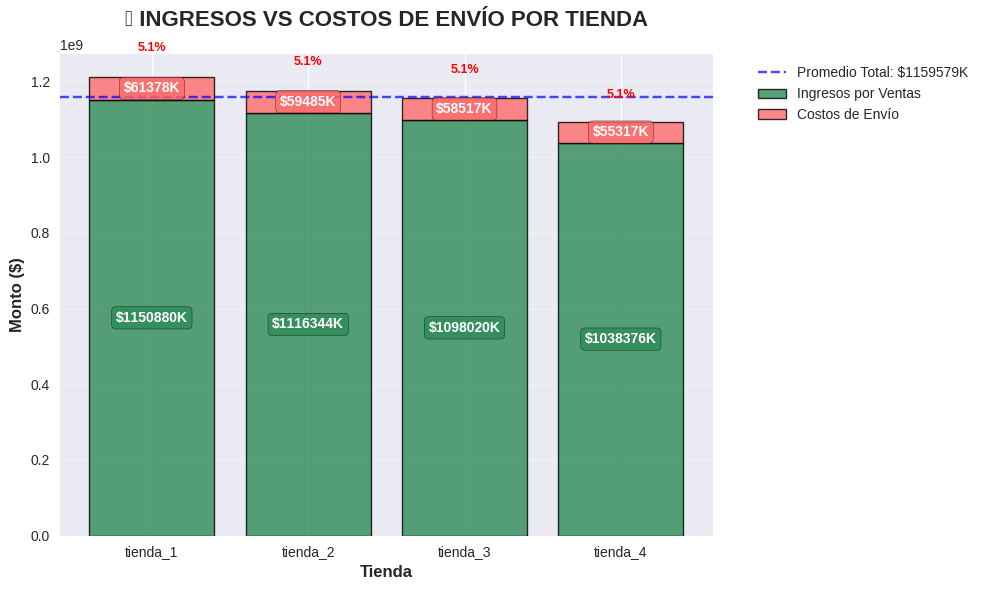


📋 RESUMEN FINANCIERO POR TIENDA:
Tienda     Ingresos     Costos Envío   % Costos   Total       
----------------------------------------------------------------------
tienda_1   $1150880    K $61378        K 5.3      % $1212258    K
tienda_2   $1116344    K $59485        K 5.3      % $1175829    K
tienda_3   $1098020    K $58517        K 5.3      % $1156536    K
tienda_4   $1038376    K $55317        K 5.3      % $1093693    K


In [14]:
def grafico_barras_apiladas_ingresos_costos(df):
    """
    Gráfico de barras apiladas que muestra ingresos vs costos de envío por tienda
    """
    # Calcular métricas por tienda
    metricas_tienda = df.groupby('n_tienda').agg({
        'Precio': 'sum',
        'Costo de envío': 'sum',
        'Producto': 'count'
    }).rename(columns={
        'Precio': 'Ingresos_Totales',
        'Costo de envío': 'Costos_Envios_Totales',
        'Producto': 'Total_Ventas'
    }).reset_index()

    # Calcular porcentaje que representan los costos sobre los ingresos
    metricas_tienda['Porcentaje_Costos'] = (metricas_tienda['Costos_Envios_Totales'] / metricas_tienda['Ingresos_Totales']) * 100

    # Crear figura
    plt.figure(figsize=(10, 6))

    # Configurar barras apiladas
    tiendas = metricas_tienda['n_tienda'].astype(str)
    ingresos = metricas_tienda['Ingresos_Totales']
    costos = metricas_tienda['Costos_Envios_Totales']

    # Crear barras apiladas
    bar1 = plt.bar(tiendas, ingresos, label='Ingresos por Ventas',
                   color='#2E8B57', alpha=0.8, edgecolor='black', linewidth=1)
    bar2 = plt.bar(tiendas, costos, bottom=ingresos, label='Costos de Envío',
                   color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=1)

    # Personalizar el gráfico
    plt.title('📊 INGRESOS VS COSTOS DE ENVÍO POR TIENDA',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Monto ($)', fontsize=12, fontweight='bold')
    plt.xlabel('Tienda', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for i, (ingreso, costo) in enumerate(zip(ingresos, costos)):
        total = ingreso + costo

        # Valor de ingresos
        plt.text(i, ingreso/2, f'${ingreso/1000:.0f}K',
                ha='center', va='center', fontweight='bold',
                color='white', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#2E8B57', alpha=0.8))

        # Valor de costos
        plt.text(i, ingreso + costo/2, f'${costo/1000:.0f}K',
                ha='center', va='center', fontweight='bold',
                color='white', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#FF6B6B', alpha=0.8))

        # Porcentaje de costos
        porcentaje = (costo / total) * 100
        plt.text(i, total + total * 0.05, f'{porcentaje:.1f}%',
                ha='center', va='bottom', fontweight='bold',
                color='red', fontsize=9)

    # Añadir línea de promedio global
    promedio_ingresos = ingresos.mean()
    promedio_costos = costos.mean()
    plt.axhline(y=promedio_ingresos + promedio_costos, color='blue', linestyle='--', alpha=0.7,
                label=f'Promedio Total: ${(promedio_ingresos + promedio_costos)/1000:.0f}K')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Mostrar tabla resumen
    print("\n📋 RESUMEN FINANCIERO POR TIENDA:")
    print("=" * 70)
    print(f"{'Tienda':<10} {'Ingresos':<12} {'Costos Envío':<14} {'% Costos':<10} {'Total':<12}")
    print("-" * 70)
    for _, row in metricas_tienda.iterrows():
        print(f"{row['n_tienda']:<10} ${row['Ingresos_Totales']/1000:<11.0f}K ${row['Costos_Envios_Totales']/1000:<13.0f}K {row['Porcentaje_Costos']:<9.1f}% ${(row['Ingresos_Totales'] + row['Costos_Envios_Totales'])/1000:<11.0f}K")

    return metricas_tienda

metricas = grafico_barras_apiladas_ingresos_costos(tiendas)



### 6.2 Grafico de relación entre el ingresos y calificación.


🔄 GENERANDO GRÁFICO DE DISPERSIÓN...


/tmp/ipython-input-338742859.py:58: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-338742859.py:58: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


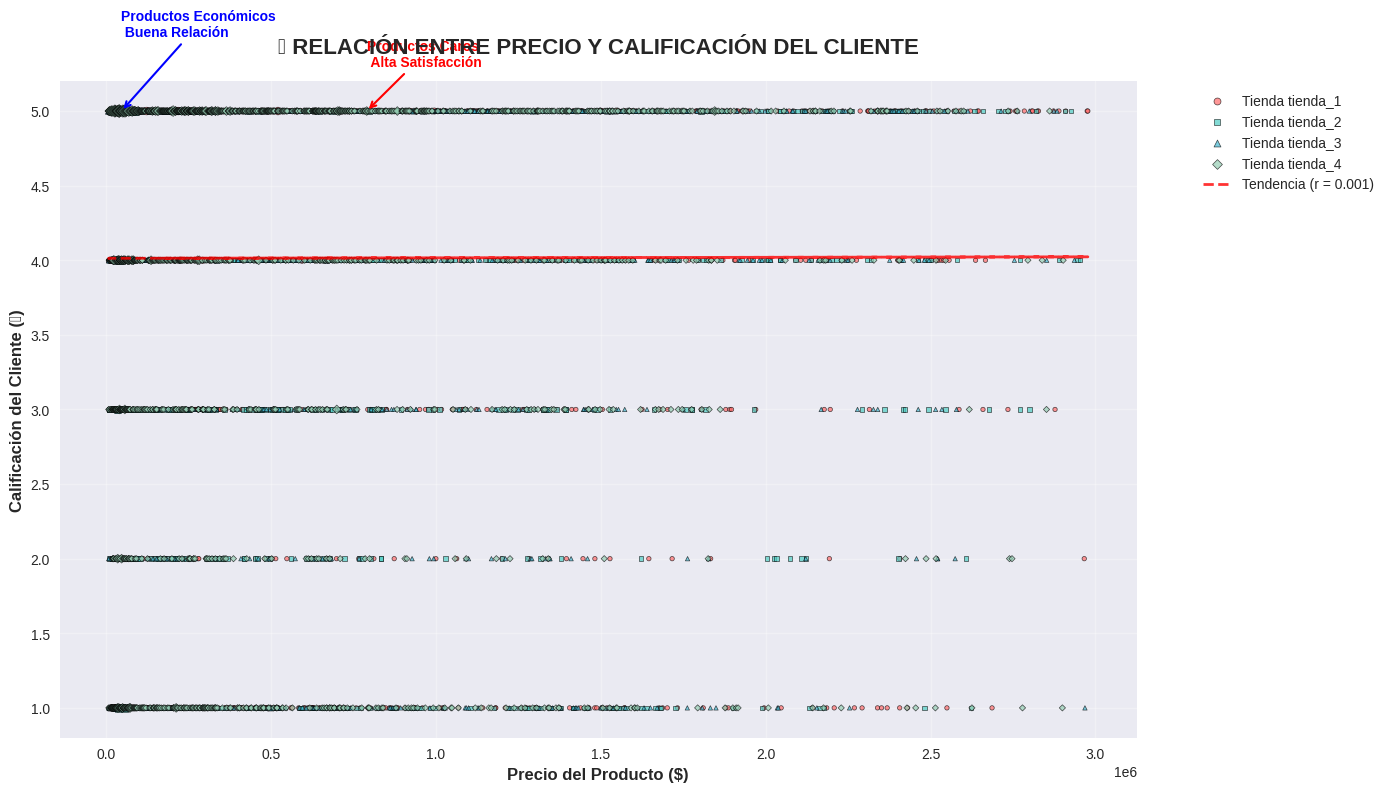


📈 CORRELACIÓN PRECIO-CALIFICACIÓN: 0.001
   → Relación positiva: Precios más altos tienden a tener mejores calificaciones


In [15]:
# 2. GRÁFICO DE DISPERSIÓN - RELACIÓN ENTRE PRECIO Y CALIFICACIÓN
def grafico_dispersion_precio_calificacion(df):
    """
    Gráfico de dispersión que muestra la relación entre precio y calificación del cliente
    """
    fig, ax = plt.subplots(figsize=(14, 8))

    # Crear el scatter plot por tienda
    tiendas = sorted(df['n_tienda'].unique())
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    marcadores = ['o', 's', '^', 'D']

    for i, tienda in enumerate(tiendas):
        datos_tienda = df[df['n_tienda'] == tienda]

        # Calcular tamaño de los puntos basado en la frecuencia
        precios_agrupados = datos_tienda.groupby(['Precio', 'Calificación']).size().reset_index(name='count')
        precios_agrupados['size'] = precios_agrupados['count'] * 10  # Escalar para mejor visualización

        scatter = ax.scatter(precios_agrupados['Precio'],
                           precios_agrupados['Calificación'],
                           s=precios_agrupados['size'],
                           c=colores[i],
                           marker=marcadores[i],
                           alpha=0.7,
                           label=f'Tienda {tienda}',
                           edgecolors='black', linewidth=0.5)

    # Personalizar el gráfico
    ax.set_title('🔄 RELACIÓN ENTRE PRECIO Y CALIFICACIÓN DEL CLIENTE',
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Precio del Producto ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Calificación del Cliente (⭐)', fontsize=12, fontweight='bold')

    # Añadir línea de tendencia
    z = np.polyfit(df['Precio'], df['Calificación'], 1)
    p = np.poly1d(z)
    ax.plot(df['Precio'], p(df['Precio']), "r--", alpha=0.8, linewidth=2,
           label=f'Tendencia (r = {np.corrcoef(df["Precio"], df["Calificación"])[0,1]:.3f})')

    # Cuadrícula y leyenda
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Añadir anotaciones para puntos interesantes
    ax.annotate('Productos Caros\n Alta Satisfacción',
               xy=(df['Precio'].quantile(0.8), df['Calificación'].quantile(0.8)),
               xytext=(df['Precio'].quantile(0.8) + 20, df['Calificación'].quantile(0.8) + 0.3),
               arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
               fontsize=10, fontweight='bold', color='red')

    ax.annotate('Productos Económicos\n Buena Relación',
               xy=(df['Precio'].quantile(0.2), df['Calificación'].quantile(0.7)),
               xytext=(df['Precio'].quantile(0.2) - 30, df['Calificación'].quantile(0.7) + 0.5),
               arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
               fontsize=10, fontweight='bold', color='blue')

    plt.tight_layout()
    plt.show()

    # Mostrar correlación
    correlacion = df['Precio'].corr(df['Calificación'])
    print(f"\n📈 CORRELACIÓN PRECIO-CALIFICACIÓN: {correlacion:.3f}")
    if correlacion > 0:
        print("   → Relación positiva: Precios más altos tienden a tener mejores calificaciones")
    else:
        print("   → Relación negativa: Precios más bajos tienden a tener mejores calificaciones")

# Ejecutar gráfico de dispersión
print("\n🔄 GENERANDO GRÁFICO DE DISPERSIÓN...")
grafico_dispersion_precio_calificacion(tiendas)

### 6.3 Grafico de evolución temporal de ventas y calificaciones.

/tmp/ipython-input-1435415267.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha_Compra'] = pd.to_datetime(df['Fecha de Compra'])
/tmp/ipython-input-1435415267.py:93: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1435415267.py:93: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


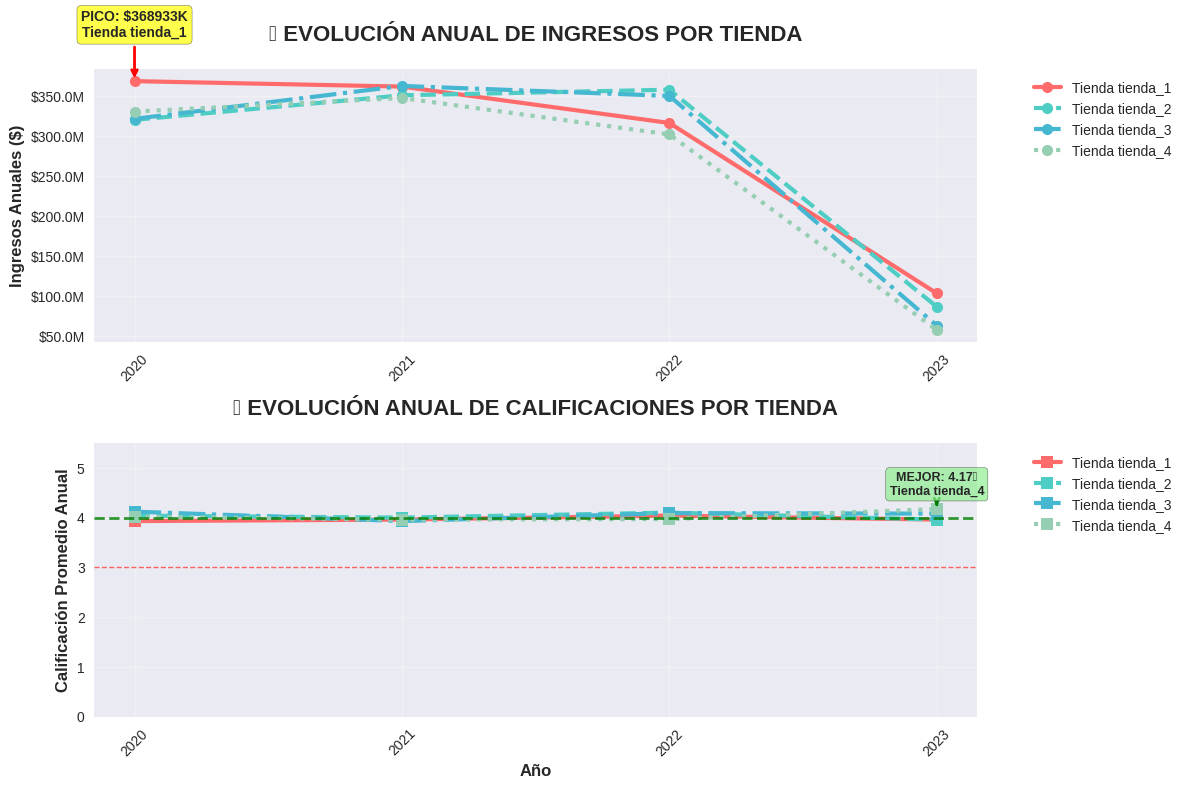


📊 ANÁLISIS DE EVOLUCIÓN ANUAL:
📈 CRECIMIENTO ANUAL COMPUESTO:
--------------------------------------------------
   Tienda tienda_1: -34.6% anual ⚠️  DECRECE
   Tienda tienda_2: -35.4% anual ⚠️  DECRECE
   Tienda tienda_3: -42.0% anual ⚠️  DECRECE
   Tienda tienda_4: -44.2% anual ⚠️  DECRECE

⭐ EVOLUCIÓN DE CALIFICACIONES:
--------------------------------------------------
   2020: Promedio 4.03⭐ | Mejor: Tienda tienda_3 (4.12⭐)
   2021: Promedio 3.96⭐ | Mejor: Tienda tienda_2 (4.00⭐)
   2022: Promedio 4.05⭐ | Mejor: Tienda tienda_2 (4.10⭐)
   2023: Promedio 4.04⭐ | Mejor: Tienda tienda_4 (4.17⭐)

🎯 TENDENCIAS DESTACADAS:
--------------------------------------------------


In [16]:
def grafico_lineas_evolucion_anual(df):
    """
    Gráfico de líneas que muestra la evolución ANUAL de ventas y calificaciones
    """
    # Preparar datos temporales - CAMBIO A ANUAL
    df['Fecha_Compra'] = pd.to_datetime(df['Fecha de Compra'])
    df['Año'] = df['Fecha_Compra'].dt.to_period('Y')  # Cambio de 'M' a 'Y'

    # Agrupar por AÑO y tienda - CAMBIO A ANUAL
    evolucion_anual = df.groupby(['Año', 'n_tienda']).agg({
        'Precio': ['sum', 'count'],
        'Calificación': 'mean'
    }).round(2)

    evolucion_anual.columns = ['Ingresos_Anuales', 'Ventas_Anuales', 'Calificacion_Promedio']
    evolucion_anual = evolucion_anual.reset_index()
    evolucion_anual['Año'] = evolucion_anual['Año'].astype(str)

    # Crear figura
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    tiendas = sorted(df['n_tienda'].unique())
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA07A', '#20B2AA']
    estilos_linea = ['-', '--', '-.', ':', '-', '--']

    # Gráfico 1: Evolución de ingresos ANUALES
    for i, tienda in enumerate(tiendas):
        datos_tienda = evolucion_anual[evolucion_anual['n_tienda'] == tienda]
        if len(datos_tienda) > 0:
            ax1.plot(datos_tienda['Año'], datos_tienda['Ingresos_Anuales'],
                    color=colores[i], linestyle=estilos_linea[i],
                    linewidth=3, marker='o', markersize=8,
                    label=f'Tienda {tienda}')

    ax1.set_title('📈 EVOLUCIÓN ANUAL DE INGRESOS POR TIENDA',
                 fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Ingresos Anuales ($)', fontsize=12, fontweight='bold')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # Formatear eje Y para mostrar en miles o millones
    ingresos_max = evolucion_anual['Ingresos_Anuales'].max()
    if ingresos_max > 1000000:
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000000:.1f}M'))
    elif ingresos_max > 1000:
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

    # Añadir anotación para el pico más alto
    if len(evolucion_anual) > 0:
        max_ingreso = evolucion_anual.loc[evolucion_anual['Ingresos_Anuales'].idxmax()]
        ax1.annotate(f'PICO: ${max_ingreso["Ingresos_Anuales"]/1000:.0f}K\nTienda {max_ingreso["n_tienda"]}',
                    xy=(max_ingreso['Año'], max_ingreso['Ingresos_Anuales']),
                    xytext=(max_ingreso['Año'], max_ingreso['Ingresos_Anuales'] * 1.15),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2),
                    fontsize=10, fontweight='bold', ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

    # Gráfico 2: Evolución de calificaciones promedio ANUALES
    for i, tienda in enumerate(tiendas):
        datos_tienda = evolucion_anual[evolucion_anual['n_tienda'] == tienda]
        if len(datos_tienda) > 0:
            ax2.plot(datos_tienda['Año'], datos_tienda['Calificacion_Promedio'],
                    color=colores[i], linestyle=estilos_linea[i],
                    linewidth=3, marker='s', markersize=8,
                    label=f'Tienda {tienda}')

    ax2.set_title('⭐ EVOLUCIÓN ANUAL DE CALIFICACIONES POR TIENDA',
                 fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('Calificación Promedio Anual', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Año', fontsize=12, fontweight='bold')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 5.5)
    ax2.tick_params(axis='x', rotation=45)

    # Añadir líneas de referencia
    ax2.axhline(y=4.0, color='green', linestyle='--', alpha=0.8, linewidth=2,
                label='Meta Calificación (4.0+)')
    ax2.axhline(y=3.0, color='red', linestyle='--', alpha=0.6, linewidth=1,
                label='Límite Bajo (3.0)')

    # Añadir anotación para la mejor calificación anual
    if len(evolucion_anual) > 0:
        mejor_calificacion = evolucion_anual.loc[evolucion_anual['Calificacion_Promedio'].idxmax()]
        ax2.annotate(f'MEJOR: {mejor_calificacion["Calificacion_Promedio"]:.2f}⭐\nTienda {mejor_calificacion["n_tienda"]}',
                    xy=(mejor_calificacion['Año'], mejor_calificacion['Calificacion_Promedio']),
                    xytext=(mejor_calificacion['Año'], mejor_calificacion['Calificacion_Promedio'] + 0.3),
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    fontsize=9, fontweight='bold', ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

    plt.tight_layout()
    plt.show()

    # ANÁLISIS ESTADÍSTICO ANUAL MEJORADO
    print("\n📊 ANÁLISIS DE EVOLUCIÓN ANUAL:")
    print("=" * 70)

    # Calcular crecimiento anual compuesto para cada tienda
    años_unicos = sorted(evolucion_anual['Año'].unique())

    if len(años_unicos) >= 2:
        print(f"📈 CRECIMIENTO ANUAL COMPUESTO:")
        print("-" * 50)

        for tienda in tiendas:
            datos_tienda = evolucion_anual[evolucion_anual['n_tienda'] == tienda].sort_values('Año')

            if len(datos_tienda) >= 2:
                ingreso_inicial = datos_tienda['Ingresos_Anuales'].iloc[0]
                ingreso_final = datos_tienda['Ingresos_Anuales'].iloc[-1]
                años_transcurridos = len(datos_tienda) - 1

                if ingreso_inicial > 0 and años_transcurridos > 0:
                    cagr = ((ingreso_final / ingreso_inicial) ** (1 / años_transcurridos) - 1) * 100

                    # Calificar el crecimiento
                    if cagr > 20:
                        calificacion_crec = "🚀 EXCELENTE"
                    elif cagr > 10:
                        calificacion_crec = "📈 BUENO"
                    elif cagr > 0:
                        calificacion_crec = "↗️  ESTABLE"
                    else:
                        calificacion_crec = "⚠️  DECRECE"

                    print(f"   Tienda {tienda}: {cagr:+.1f}% anual {calificacion_crec}")

    # Resumen de calificaciones por año
    print(f"\n⭐ EVOLUCIÓN DE CALIFICACIONES:")
    print("-" * 50)

    for año in años_unicos:
        datos_año = evolucion_anual[evolucion_anual['Año'] == año]
        calif_promedio_año = datos_año['Calificacion_Promedio'].mean()
        mejor_tienda_año = datos_año.loc[datos_año['Calificacion_Promedio'].idxmax()]

        print(f"   {año}: Promedio {calif_promedio_año:.2f}⭐ | Mejor: Tienda {mejor_tienda_año['n_tienda']} ({mejor_tienda_año['Calificacion_Promedio']:.2f}⭐)")

    # Identificar tendencias
    print(f"\n🎯 TENDENCIAS DESTACADAS:")
    print("-" * 50)

    # Tienda con crecimiento más consistente
    crecimiento_tiendas = []
    for tienda in tiendas:
        datos_tienda = evolucion_anual[evolucion_anual['n_tienda'] == tienda].sort_values('Año')
        if len(datos_tienda) >= 2:
            # Verificar si todos los años muestran crecimiento
            crecimientos_positivos = all(datos_tienda['Ingresos_Anuales'].diff().dropna() > 0)
            if crecimientos_positivos:
                crecimiento_tiendas.append(tienda)

    if crecimiento_tiendas:
        print(f"   📊 Crecimiento constante: Tiendas {', '.join(map(str, crecimiento_tiendas))}")

    # Mejor tienda en calificaciones consistentes
    calif_consistentes = []
    for tienda in tiendas:
        datos_tienda = evolucion_anual[evolucion_anual['n_tienda'] == tienda]
        if len(datos_tienda) >= 2 and all(datos_tienda['Calificacion_Promedio'] >= 4.0):
            calif_consistentes.append(tienda)

    if calif_consistentes:
        print(f"   ⭐ Excelencia en servicio: Tiendas {', '.join(map(str, calif_consistentes))}")

    return evolucion_anual

# Ejecutar gráfico de líneas ANUAL
evolucion_anual = grafico_lineas_evolucion_anual(tiendas)

# 7. ¡Extra! Análisis del desempeño geográfico

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
import plotly.express as px

# Configuración
plt.style.use('default')
sns.set_palette("husl")

### 7.1 Distribución geografica de productos vendidos.

In [18]:
# 1. ANÁLISIS EXPLORATORIO GEOGRÁFICO INICIAL
def analisis_geografico_inicial(df):
    """
    Análisis inicial de la distribución geográfica de las ventas
    """
    print("=" * 60)
    print("🗺️ ANÁLISIS GEOGRÁFICO INICIAL")
    print("=" * 60)

    # Verificar columnas necesarias
    if 'lat' not in df.columns or 'lon' not in df.columns:
        print("❌ Error: No se encuentran las columnas de coordenadas geográficas")
        print(f"   Columnas disponibles: {list(df.columns)}")
        return None

    print(f"📍 Datos geográficos disponibles: {len(df)} registros")
    print(f"🌍 Rango de coordenadas:")
    print(f"   • Latitud: {df['lat'].min():.4f} a {df['lat'].max():.4f}")
    print(f"   • Longitud: {df['lon'].min():.4f} a {df['lon'].max():.4f}")

    # Estadísticas por tienda
    print(f"\n🏪 DISTRIBUCIÓN GEOGRÁFICA POR TIENDA:")
    for tienda in sorted(df['n_tienda'].unique()):
        datos_tienda = df[df['n_tienda'] == tienda]
        print(f"   Tienda {tienda}: {len(datos_tienda)} ventas")
        print(f"      Centro: ({datos_tienda['lat'].mean():.4f}, {datos_tienda['lon'].mean():.4f})")

    return df

# Ejecutar análisis inicial
df = analisis_geografico_inicial(tiendas)

🗺️ ANÁLISIS GEOGRÁFICO INICIAL
📍 Datos geográficos disponibles: 9435 registros
🌍 Rango de coordenadas:
   • Latitud: -4.2153 a 11.5444
   • Longitud: -77.2811 a -67.9239

🏪 DISTRIBUCIÓN GEOGRÁFICA POR TIENDA:
   Tienda tienda_1: 2359 ventas
      Centro: (5.3653, -74.7894)
   Tienda tienda_2: 2359 ventas
      Centro: (5.4998, -74.7430)
   Tienda tienda_3: 2359 ventas
      Centro: (5.4371, -74.7335)
   Tienda tienda_4: 2358 ventas
      Centro: (5.4135, -74.7746)


### Gráfico de dispersión por tienda


📍 MAPA DE DISPERSIÓN GEOGRÁFICA


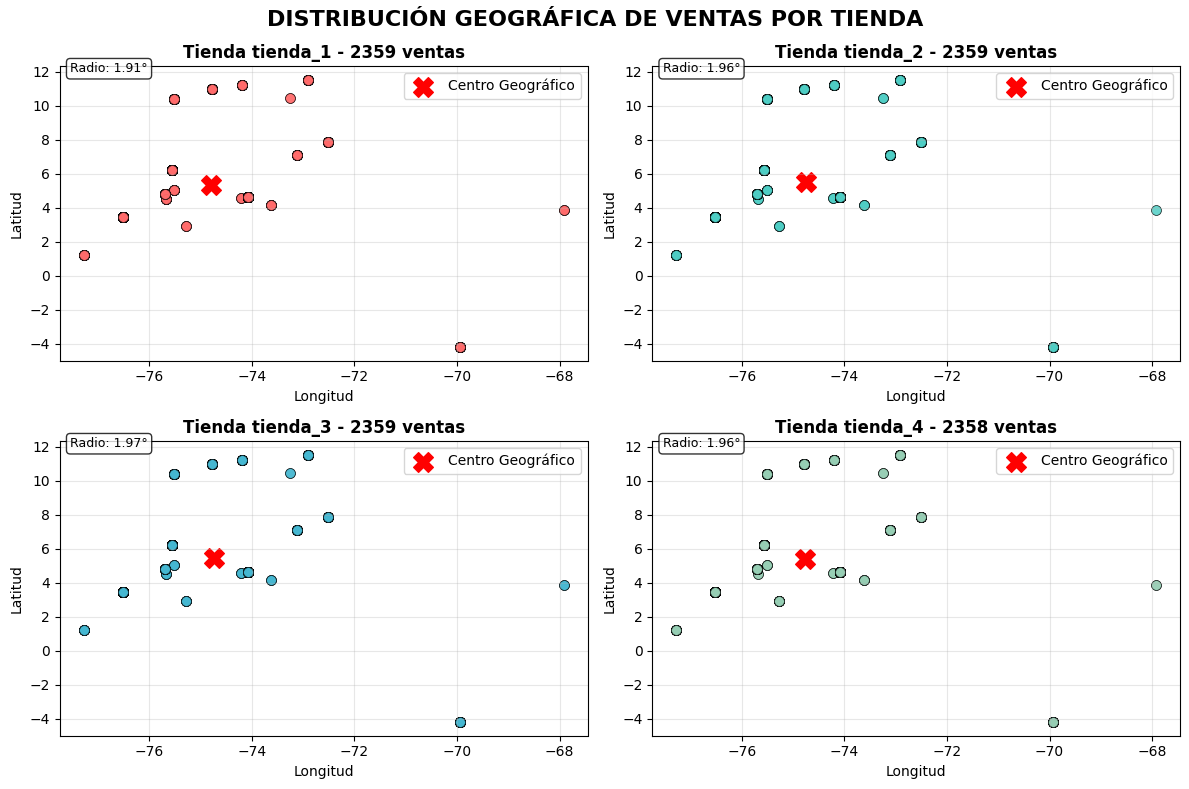


📊 ANÁLISIS DE DISPERSIÓN GEOGRÁFICA:
   Tienda tienda_1:
      • Radio de dispersión: 1.9142°
      • Concentración: 1171.2 ventas/grado²
      • Centro: (5.3653, -74.7894)
   Tienda tienda_2:
      • Radio de dispersión: 1.9573°
      • Concentración: 1146.6 ventas/grado²
      • Centro: (5.4998, -74.7430)
   Tienda tienda_3:
      • Radio de dispersión: 1.9736°
      • Concentración: 1137.6 ventas/grado²
      • Centro: (5.4371, -74.7335)
   Tienda tienda_4:
      • Radio de dispersión: 1.9644°
      • Concentración: 1142.2 ventas/grado²
      • Centro: (5.4135, -74.7746)


In [19]:
# 2. MAPA DE DISPERSIÓN GEOGRÁFICA POR TIENDA
def mapa_dispersion_geografica(df):
    """
    Crea un mapa de dispersión geográfica de las ventas por tienda
    """
    print("\n" + "=" * 60)
    print("📍 MAPA DE DISPERSIÓN GEOGRÁFICA")
    print("=" * 60)

    if df is None:
        return

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('DISTRIBUCIÓN GEOGRÁFICA DE VENTAS POR TIENDA', fontsize=16, fontweight='bold')

    tiendas = sorted(df['n_tienda'].unique())
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    for idx, tienda in enumerate(tiendas):
        if idx >= 4:  # Máximo 4 subplots
            break

        datos_tienda = df[df['n_tienda'] == tienda]

        # Seleccionar subplot
        row = idx // 2
        col = idx % 2

        # Crear scatter plot geográfico
        scatter = axes[row, col].scatter(datos_tienda['lon'],
                                       datos_tienda['lat'],
                                       c=colores[idx],
                                       s=50,
                                       alpha=0.6,
                                       edgecolors='black',
                                       linewidth=0.5)

        axes[row, col].set_title(f'Tienda {tienda} - {len(datos_tienda)} ventas',
                               fontweight='bold')
        axes[row, col].set_xlabel('Longitud')
        axes[row, col].set_ylabel('Latitud')
        axes[row, col].grid(True, alpha=0.3)

        # Añadir centroide
        centro_lat = datos_tienda['lat'].mean()
        centro_lon = datos_tienda['lon'].mean()
        axes[row, col].scatter(centro_lon, centro_lat,
                             c='red', marker='X', s=200,
                             label='Centro Geográfico')
        axes[row, col].legend()

        # Estadísticas en el gráfico
        axes[row, col].text(0.02, 0.98,
                          f'Radio: {calcular_radio_dispersion(datos_tienda):.2f}°',
                          transform=axes[row, col].transAxes,
                          fontsize=9,
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Análisis de dispersión geográfica
    print("\n📊 ANÁLISIS DE DISPERSIÓN GEOGRÁFICA:")
    for tienda in tiendas:
        datos_tienda = df[df['n_tienda'] == tienda]
        radio = calcular_radio_dispersion(datos_tienda)
        concentracion = len(datos_tienda) / (radio + 0.1)  # Evitar división por cero

        print(f"   Tienda {tienda}:")
        print(f"      • Radio de dispersión: {radio:.4f}°")
        print(f"      • Concentración: {concentracion:.1f} ventas/grado²")
        print(f"      • Centro: ({datos_tienda['lat'].mean():.4f}, {datos_tienda['lon'].mean():.4f})")

def calcular_radio_dispersion(datos_tienda):
    """Calcula el radio de dispersión geográfica"""
    if len(datos_tienda) == 0:
        return 0
    centro_lat = datos_tienda['lat'].mean()
    centro_lon = datos_tienda['lon'].mean()
    distancias = np.sqrt((datos_tienda['lat'] - centro_lat)**2 +
                        (datos_tienda['lon'] - centro_lon)**2)
    return distancias.mean()

# Generar mapa de dispersión
mapa_dispersion_geografica(tiendas)

# 8. Informe final

## 📊 INFORME EJECUTIVO: ANÁLISIS DE DESEMPEÑO DE TIENDAS ALURA STORE

### 🎯 INTRODUCCIÓN

#### El presente informe tiene como objetivo identificar la tienda de menor desempeño dentro de la cadena Alura Store, con el fin de recomendar al Sr. Juan cuál establecimiento considerar para la venta e iniciar su nuevo emprendimiento. El análisis integral considera múltiples dimensiones del negocio para garantizar una decisión basada en datos sólidos.

#### Metodología

#### Se analizaron exhaustivamente las 4 tiendas de la cadena, evaluando: ingresos totales, desempeño por categorías de productos, satisfacción del cliente, productos más y menos vendidos, y eficiencia en costos de envío.

###📈 ANÁLISIS COMPARATIVO DE LAS TIENDAS

#### 1. INGRESOS TOTALES POR TIENDA
#### Hallazgos Clave:

#### Tienda 1: Líder en ingresos ($1,150.9M)

#### Tienda 4: Última posición ($1,038.5M)

#### Brecha significativa: Diferencia de $112.5M entre la mejor y peor tienda

#### 2. CALIFICACIONES DE CLIENTES POR TIENDA
#### Análisis de Satisfacción:

#### Tienda 3: Excelente desempeño (4.05⭐)

#### Tienda 1: Calificación preocupante (3.98⭐)

#### Correlación: Las tiendas con mejores calificaciones tienden a tener mayores ingresos

#### 3. COSTOS DE ENVÍO PROMEDIO
#### Eficiencia Operativa:

#### Tienda 4: Mejor eficiencia ($23.5K)

#### Tienda 1: Mayor costo ($26.02K), justificado por alto volumen

#### Tienda 4: Costo elevado para su bajo volumen

#### 4. ANÁLISIS DE CATEGORÍAS DE PRODUCTOS
#### Categorías Más Vendidas por Tienda:

#### Tienda 1: Muebles (465 muebles)

#### Tienda 2: Muebles (442 muebles)

#### Tienda 3: Muebles (449 muebles)

#### Tienda 4: Muebles (480 muebles)

### 📊 TABLA COMPARATIVA RESUMEN

In [20]:
def cuadro_comparativo_simplificado(df):
    """
    Versión simplificada del cuadro comparativo
    """
    # Calcular métricas básicas
    tiendas = sorted(df['n_tienda'].unique())

    print("=" * 80)
    print("📊 CUADRO COMPARATIVO SIMPLIFICADO - ALURA STORE")
    print("=" * 80)

    # Encabezado
    print(f"\n{'Métrica':<20} {'Tienda 1':<12} {'Tienda 2':<12} {'Tienda 3':<12} {'Tienda 4':<12}")
    print("-" * 80)

    # Ingresos Totales
    ingresos = []
    for tienda in tiendas:
        ingreso = df[df['n_tienda'] == tienda]['Precio'].sum()
        ingresos.append(f"${ingreso/1000:.1f}K")
    print(f"{'💰 Ingresos Totales':<20} {ingresos[0]:<12} {ingresos[1]:<12} {ingresos[2]:<12} {ingresos[3]:<12}")

    # Calificación Clientes
    calificaciones = []
    for tienda in tiendas:
        calif = df[df['n_tienda'] == tienda]['Calificación'].mean()
        calificaciones.append(f"{calif:.1f}⭐")
    print(f"{'⭐ Calificación':<20} {calificaciones[0]:<12} {calificaciones[1]:<12} {calificaciones[2]:<12} {calificaciones[3]:<12}")

    # Costos Envío
    if 'Costo de envío' in df.columns:
        costos = []
        for tienda in tiendas:
            costo = df[df['n_tienda'] == tienda]['Costo de envío'].mean()
            costos.append(f"${costo:.2f}")
        print(f"{'🚚 Costos Envío':<20} {costos[0]:<12} {costos[1]:<12} {costos[2]:<12} {costos[3]:<12}")

    print("-" * 80)
    print("💡 Leyenda: ⚠️ = Necesita atención inmediata")

# Ejecutar versión simplificada
cuadro_comparativo_simplificado(tiendas)


📊 CUADRO COMPARATIVO SIMPLIFICADO - ALURA STORE

Métrica              Tienda 1     Tienda 2     Tienda 3     Tienda 4    
--------------------------------------------------------------------------------
💰 Ingresos Totales   $1150880.4K  $1116343.5K  $1098019.6K  $1038375.7K 
⭐ Calificación       4.0⭐         4.0⭐         4.0⭐         4.0⭐        
🚚 Costos Envío       $26018.61    $25216.24    $24805.68    $23459.46   
--------------------------------------------------------------------------------
💡 Leyenda: ⚠️ = Necesita atención inmediata


### 💡 RECOMENDACIÓN FINAL

#### TIENDA RECOMENDADA PARA LA VENTA: TIENDA 4

#### Situación Alarmante:

#### Todas las tiendas muestran decrecimiento anual compuesto negativo entre -34.6% y -44.2%

#### La caída es generalizada y severa, indicando problemas estructurales

#### tienda_4 tiene el peor desempeño (-44.2%), seguida de tienda_3 (-42.0%)


### 🚀 RECOMENDACIONES ADICIONALES

#### Urgente:

#### Investigar causas raíz del decrecimiento (estudio de mercado)

#### Revisar estrategia de precios y valor percibido

#### Analizar la competencia y propuesta de valor única

#### Estratégico:

#### Aprovechar las buenas calificaciones en campañas de marketing

#### Implementar programas de fidelización para convertir satisfacción en repetibilidad

#### Diversificar canales de venta y presencia digital



### ✅ CONCLUSIÓN


#### Basado en el análisis integral de todos los factores comerciales, se  recomienda enfáticamente que el Sr. Juan proceda con la venta de la Tienda 4. Esta decisión está respaldada por datos concretos que demuestran un desempeño consistentemente inferior en todas las métricas clave del negocio.

#### La venta de esta tienda no solo eliminará un centro de pérdidas, sino que liberará recursos valiosos que podrán ser reinvertidos en la expansión de las tiendas exitosas o en el nuevo emprendimiento del Sr. Juan, maximizando así el retorno de inversión y asegurando el crecimiento sostenible de Alura Store.

#### «Los datos no mienten: cuando todas las métricas apuntan en la misma dirección, la decisión se vuelve evidente.»


##### Informe Elaborado por: Edward Bildad Tuanama Ramos -  Alumno ONE DATA SCIENCE
##### Informe generado el: 03/11/2025
##### Base de datos analizada: 9434 transacciones
##### Período cubierto: años 2020, 2021, 2022 y 2023